In [1]:
import pandas as pd
import numpy as np




In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='OVG9kwLdrYg6k70Mg48_gYPXp10ziQCvT69OT-oSGV9K',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'smartlender-donotdelete-pr-ljbxm1ibrnk2g0'
object_key = 'loan_credibility_data.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df= pd.read_csv(body)
df.head()


,Unnamed: 0,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,145758,145759,9961107,33,15,single,rented,yes,Surveyor,Karimnagar,Telangana,11,14,0
1,133647,133648,4098399,79,15,single,rented,no,Computer_hardware_engineer,Aurangabad,Maharashtra,10,12,0
2,70149,70150,990478,26,15,single,norent_noown,no,Geologist,Ahmednagar,Maharashtra,5,13,0
3,193036,193037,9571049,43,8,single,rented,yes,Librarian,Bally,West_Bengal,8,11,0
4,45984,45985,7790773,40,10,married,rented,yes,Software_Developer,Bahraich,Uttar_Pradesh,9,12,1


In [3]:
df.head()

,Unnamed: 0,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,145758,145759,9961107,33,15,single,rented,yes,Surveyor,Karimnagar,Telangana,11,14,0
1,133647,133648,4098399,79,15,single,rented,no,Computer_hardware_engineer,Aurangabad,Maharashtra,10,12,0
2,70149,70150,990478,26,15,single,norent_noown,no,Geologist,Ahmednagar,Maharashtra,5,13,0
3,193036,193037,9571049,43,8,single,rented,yes,Librarian,Bally,West_Bengal,8,11,0
4,45984,45985,7790773,40,10,married,rented,yes,Software_Developer,Bahraich,Uttar_Pradesh,9,12,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           20000 non-null  int64 
 1   Id                   20000 non-null  int64 
 2   income               20000 non-null  int64 
 3   age                  20000 non-null  int64 
 4   experience           20000 non-null  int64 
 5   married              20000 non-null  object
 6   house_ownership      20000 non-null  object
 7   car_ownership        20000 non-null  object
 8   profession           20000 non-null  object
 9   city                 20000 non-null  object
 10  state                20000 non-null  object
 11  current_job_years    20000 non-null  int64 
 12  current_house_years  20000 non-null  int64 
 13  risk_flag            20000 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 2.1+ MB


In [5]:
df.isnull().sum()

Unnamed: 0             0
Id                     0
income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
city                   0
state                  0
current_job_years      0
current_house_years    0
risk_flag              0
dtype: int64

In [6]:
(df.drop(columns="Id")).duplicated().sum()

0

In [7]:
df=df.drop(columns=["Unnamed: 0","Id","state","city"])
df.head()

,income,age,experience,married,house_ownership,car_ownership,profession,current_job_years,current_house_years,risk_flag
0,9961107,33,15,single,rented,yes,Surveyor,11,14,0
1,4098399,79,15,single,rented,no,Computer_hardware_engineer,10,12,0
2,990478,26,15,single,norent_noown,no,Geologist,5,13,0
3,9571049,43,8,single,rented,yes,Librarian,8,11,0
4,7790773,40,10,married,rented,yes,Software_Developer,9,12,1


In [8]:
for i in df.columns:
    print(df[i].unique())

[9961107 4098399  990478 ... 9584983 9878857 4683990]
[33 79 26 43 40 45 25 32 29 38 75 72 71 58 63 54 28 47 73 66 62 76 46 64
 61 65 55 39 69 74 24 70 59 67 21 51 56 22 48 78 30 57 53 68 37 50 27 77
 36 23 34 44 52 49 60 35 41 31 42]
[15  8 10 18 11  9  4  5 14 13 17  7 12 19  3  0  6  1  2 16 20]
['single' 'married']
['rented' 'norent_noown' 'owned']
['yes' 'no']
['Surveyor' 'Computer_hardware_engineer' 'Geologist' 'Librarian'
 'Software_Developer' 'Statistician' 'Civil_servant' 'Politician'
 'Secretary' 'Aviator' 'Comedian' 'Artist' 'Web_designer'
 'Chartered_Accountant' 'Graphic_Designer' 'Petroleum_Engineer' 'Analyst'
 'Psychologist' 'Magistrate' 'Chemical_engineer' 'Civil_engineer'
 'Economist' 'Drafter' 'Engineer' 'Financial_Analyst' 'Flight_attendant'
 'Computer_operator' 'Architect' 'Technical_writer' 'Designer'
 'Industrial_Engineer' 'Dentist' 'Technician' 'Design_Engineer'
 'Physician' 'Official' 'Army_officer' 'Police_officer' 'Surgeon'
 'Air_traffic_controller' 'Mechanical

In [9]:
df["risk_flag"].value_counts()

0    17530
1     2470
Name: risk_flag, dtype: int64

In [10]:
df["married"].replace({'single':0,"married":1},inplace=True)
df["car_ownership"].replace({'no':0,"yes":1},inplace=True)
df["house_ownership"].replace({'norent_noown':0,"rented":1,"owned":2},inplace=True)

In [11]:
cs=["Computer_hardware_engineer","Software_Developer","Web_designer","Computer_operator"]
eng=["Petroleum_Engineer","Chemical_engineer","Civil_engineer","Engineer","Design_Engineer","Industrial_Engineer","Mechanical_engineer","Biomedical_Engineer"]
med=["Psychologist","Dentist","Surgeon","Physician","Microbiologist"]
sol=["Aviator","Police_officer","Firefighter","Air_traffic_controller","Army_officer"]
eco=["Chartered_Accountant","Analyst","Financial_Analyst","Consultant","Statistician","Economist"]
art=["Artist","Graphic_Designer","Drafter","Architect","Designer","Fashion_Designer"]
govt=["Secretary","Surveyor","Magistrate","Civil_servant","Lawyer","Official","Scientist"]
others=["Librarian","Politician","Geologist","Comedian","Flight_attendant","Technical_writer","Technician","Chef","Technology_specialist","Hotel_Manager"]


In [12]:
df["profession"].unique().shape

(51,)

In [13]:
len(cs)+len(eng)+len(med)+len(sol)+len(eco)+len(art)+len(govt)+len(others)

51

In [14]:
df["computer_science"]=np.where(df["profession"].isin(cs),1,0 )
df["Engineering"]=np.where(df["profession"].isin(eng),1,0 )
df["Medical"]=np.where(df["profession"].isin(med),1,0 )
df["Finance"]=np.where(df["profession"].isin(eco),1,0 )
df["Arts"]=np.where(df["profession"].isin(art),1,0 )
df["Government"]=np.where(df["profession"].isin(govt),1,0 )
df["Others"]=np.where(df["profession"].isin(others),1,0 )
df["Defence"]=np.where(df["profession"].isin(sol),1,0 )

In [15]:
df.head()

,income,age,experience,married,house_ownership,car_ownership,profession,current_job_years,current_house_years,risk_flag,computer_science,Engineering,Medical,Finance,Arts,Government,Others,Defence
0,9961107,33,15,0,1,1,Surveyor,11,14,0,0,0,0,0,0,1,0,0
1,4098399,79,15,0,1,0,Computer_hardware_engineer,10,12,0,1,0,0,0,0,0,0,0
2,990478,26,15,0,0,0,Geologist,5,13,0,0,0,0,0,0,0,1,0
3,9571049,43,8,0,1,1,Librarian,8,11,0,0,0,0,0,0,0,1,0
4,7790773,40,10,1,1,1,Software_Developer,9,12,1,1,0,0,0,0,0,0,0


In [16]:
(df["computer_science"]+df["Engineering"]+df["Medical"]+df["Arts"]+df["Government"]+df["Others"]+df["Finance"]+df["Defence"]).sum()

20000

In [17]:
len(df["profession"].value_counts())

51

<AxesSubplot:xlabel='income'>

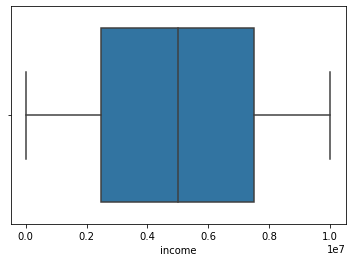

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='income',data=df)

<AxesSubplot:>

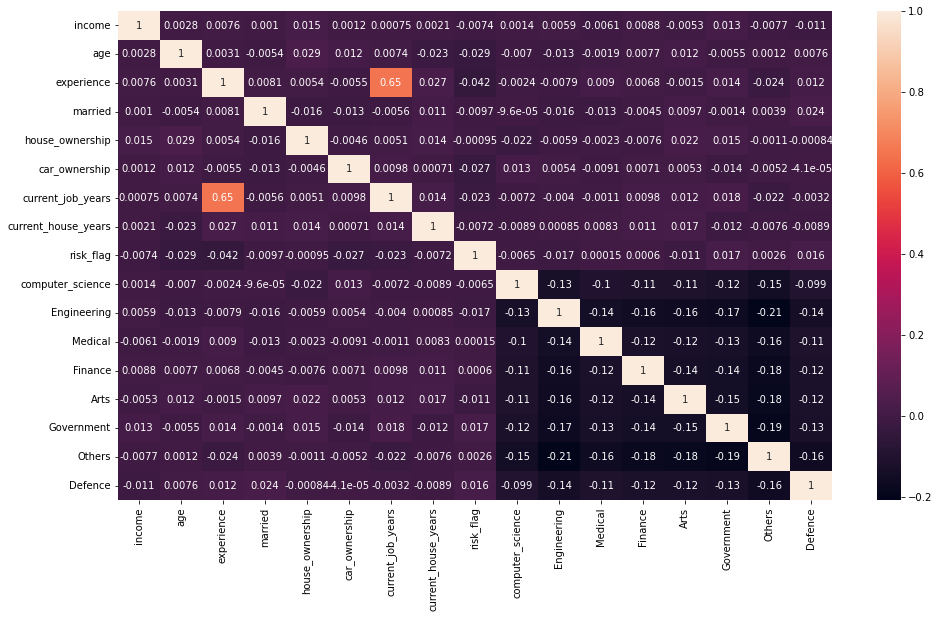

In [19]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True)

In [20]:
for i in df.columns:
    print(df[i].value_counts())

6963857    10
8724013    10
3915449    10
9013759     9
2860021     9
           ..
6133287     1
8565895     1
4103658     1
8955309     1
4683990     1
Name: income, Length: 8584, dtype: int64
27    430
41    413
33    399
66    397
48    394
50    386
25    385
45    381
68    381
78    379
24    377
54    377
47    374
23    373
69    372
56    367
55    367
35    366
72    365
79    365
76    361
53    351
49    351
26    349
43    348
60    345
64    343
31    341
37    339
58    337
30    333
71    332
22    331
61    330
59    329
28    328
62    328
57    323
32    322
38    320
67    318
39    318
77    313
74    313
70    310
40    310
42    309
65    305
34    305
29    304
21    302
63    298
75    296
44    293
73    283
46    277
51    263
52    257
36    237
Name: age, dtype: int64
12    1088
6     1074
5     1022
9     1008
17    1006
18     996
10     990
16     969
14     963
19     963
3      945
4      922
11     915
13     913
2      909
15     903
7      890
8   

In [21]:
df.describe()

,income,age,experience,married,house_ownership,car_ownership,current_job_years,current_house_years,risk_flag,computer_science,Engineering,Medical,Finance,Arts,Government,Others,Defence
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.998404e+06,49.880150,10.073850,0.101750,1.024600,0.302600,6.332550,11.999800,0.123500,0.084600,0.154350,0.101500,0.117300,0.120800,0.133100,0.192000,0.096350
std,2.888663e+06,17.106119,5.988054,0.302327,0.282133,0.459395,3.653536,1.406165,0.329018,0.278292,0.361293,0.301997,0.321785,0.325903,0.339691,0.393883,0.295078
min,1.031000e+04,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.487718e+06,35.000000,5.000000,0.000000,1.000000,0.000000,4.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.995311e+06,50.000000,10.000000,0.000000,1.000000,0.000000,6.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.492021e+06,65.000000,15.000000,0.000000,1.000000,1.000000,9.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999400e+06,79.000000,20.000000,1.000000,2.000000,1.000000,14.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='age'>

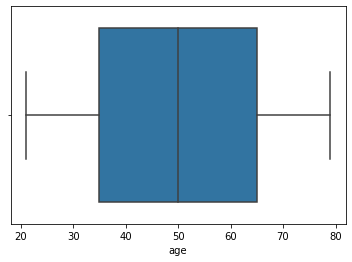

In [22]:
sns.boxplot(x='age',data=df)

<AxesSubplot:xlabel='experience'>

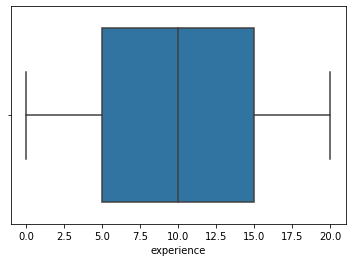

In [23]:
sns.boxplot(x='experience',data=df)

<AxesSubplot:xlabel='current_job_years'>

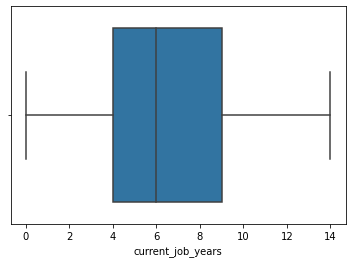

In [24]:
sns.boxplot(x='current_job_years',data=df)

<AxesSubplot:xlabel='current_house_years'>

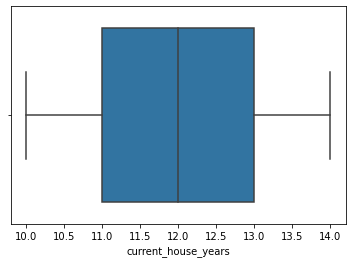

In [25]:
sns.boxplot(x='current_house_years',data=df)

<AxesSubplot:xlabel='age', ylabel='income'>

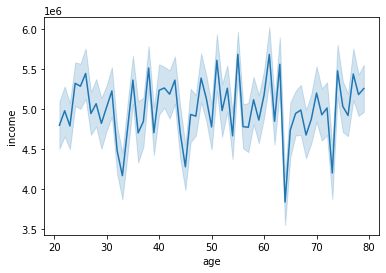

In [26]:
sns.lineplot(x='age',y='income',data=df)

In [27]:
df[df['Government']==1].describe()

,income,age,experience,married,house_ownership,car_ownership,current_job_years,current_house_years,risk_flag,computer_science,Engineering,Medical,Finance,Arts,Government,Others,Defence
count,2.662000e+03,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.0,2662.0,2662.0,2662.0,2662.0,2662.0,2662.0,2662.0
mean,5.094681e+06,49.640120,10.291134,0.100676,1.035312,0.285875,6.504508,11.957551,0.137491,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
std,2.901531e+06,17.150189,5.886416,0.300956,0.278694,0.451915,3.612759,1.410516,0.344429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.111400e+04,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25%,2.561042e+06,34.000000,5.000000,0.000000,1.000000,0.000000,4.000000,11.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
50%,5.154501e+06,50.000000,11.000000,0.000000,1.000000,0.000000,6.000000,12.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75%,7.644982e+06,64.000000,15.000000,0.000000,1.000000,1.000000,9.000000,13.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
max,9.998070e+06,79.000000,20.000000,1.000000,2.000000,1.000000,14.000000,14.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
x=df.drop(columns=['profession','risk_flag'])
y=df['risk_flag']

from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy={1:6000},random_state=42)

x1,y1=smote.fit_sample(x,y)

In [29]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='OVG9kwLdrYg6k70Mg48_gYPXp10ziQCvT69OT-oSGV9K',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'smartlender-donotdelete-pr-ljbxm1ibrnk2g0'
object_key = 'X.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

x1= pd.read_csv(body)
x1=x1.iloc[:,1:]
x1.head()


,income,age,experience,married,house_ownership,car_ownership,current_job_years,current_house_years,computer_science,Engineering,Medical,Finance,Arts,Government,Others,Defence
0,9961107,33,15,0,1,1,11,14,0,0,0,0,0,1,0,0
1,4098399,79,15,0,1,0,10,12,1,0,0,0,0,0,0,0
2,990478,26,15,0,0,0,5,13,0,0,0,0,0,0,1,0
3,9571049,43,8,0,1,1,8,11,0,0,0,0,0,0,1,0
4,7790773,40,10,1,1,1,9,12,1,0,0,0,0,0,0,0


In [30]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='OVG9kwLdrYg6k70Mg48_gYPXp10ziQCvT69OT-oSGV9K',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'smartlender-donotdelete-pr-ljbxm1ibrnk2g0'
object_key = 'Y.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

y1 = pd.read_csv(body)
y1=y1.iloc[:,1:].values.ravel()
y1


array([0, 0, 0, ..., 1, 1, 1])

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.22,random_state=42)
x_test.shape

(5177, 16)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.7541046938381302

In [34]:
pred=lr.predict(x_test)
pd.DataFrame(pred).value_counts()

0    5177
dtype: int64

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=30,random_state=42)
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.8898976241066254

In [36]:
pred=dt.predict(x_test)
pd.DataFrame(pred).value_counts()

0    3878
1    1299
dtype: int64

In [37]:
y_test.shape

(5177,)

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=30,n_estimators=150,random_state=56)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.9105659648445046

In [39]:
pred=rf.predict(x_test)
pd.DataFrame(pred).value_counts()

0    4035
1    1142
dtype: int64

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.8195866331852424

In [41]:
pred=knn.predict(x_test)
pd.DataFrame(pred).value_counts()

0    4098
1    1079
dtype: int64

In [42]:
from sklearn.svm import SVC
svm=SVC(kernel='poly')
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.7541046938381302

In [43]:
pred=svm.predict(x_test)
pd.DataFrame(pred).value_counts()

0    5177
dtype: int64

In [44]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_test,y_test)

0.7541046938381302

In [45]:
import pickle
pickle.dump(rf,open('rfmodel.pkl','wb'))

In [46]:
pwd/wewe

'/home/wsuser/work'

# Deployment

In [47]:
!pip install -U ibm-watson-machine-learning

In [48]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

# Authenticate and Set Space

In [49]:
wml_cred={
    "apikey":"lOTEkqckZ_QiOKlE6ppPzOcQDEG4voYOn7G3Ci9fAbBf",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [50]:
wml_clients=APIClient(wml_cred)
wml_clients.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ---------------  ------------------------
ID                                    NAME             CREATED
7bbdd34d-1f16-4459-ac20-d1098a12cb51  newdep           2022-11-14T17:41:14.847Z
6d13714f-92f3-4a65-a7ee-b6340de2f618  deploymentspace  2022-11-14T17:11:14.425Z
------------------------------------  ---------------  ------------------------


In [64]:
space_id="7bbdd34d-1f16-4459-ac20-d1098a12cb51"

In [65]:
wml_clients.set.default_space(space_id)

'SUCCESS'

In [66]:
wml_clients.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [67]:
import sklearn
sklearn.__version__

'1.0.2'

In [68]:
MODEL_NAME="randomforest"
DEPLOYMENT_NAME="rf_deployment"
DEMO_MODEL=rf

In [69]:
soft_sepc_id=wml_clients.software_specifications.get_id_by_name("runtime-22.1-py3.9")

In [70]:
model_props={
    wml_clients.repository.ModelMetaNames.NAME:MODEL_NAME,
    wml_clients.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
    wml_clients.repository.ModelMetaNames.SOFTWARE_SPEC_UID: soft_sepc_id
    
}

In [71]:
model_details=wml_clients.repository.store_model(model=DEMO_MODEL,meta_props=model_props,training_data=x_train,
                                                training_target=y_train)

In [72]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l1',
  'schemas': {'input': [{'fields': [{'name': 'income', 'type': 'int64'},
      {'name': 'age', 'type': 'int64'},
      {'name': 'experience', 'type': 'int64'},
      {'name': 'married', 'type': 'int64'},
      {'name': 'house_ownership', 'type': 'int64'},
      {'name': 'car_ownership', 'type': 'int64'},
      {'name': 'current_job_years', 'type': 'int64'},
      {'name': 'current_house_years', 'type': 'int64'},
      {'name': 'computer_science', 'type': 'int64'},
      {'name': 'Engineering', 'type': 'int64'},
      {'name': 'Medical', 'type': 'int64'},
      {'name': 'Finance', 'type': 'int64'},
      {'name': 'Arts', 'type': 'int64'},
      {'name': 'Government', 'type': 'int64'},
      {'name': 'Others', 'type': 'int64'},
      {'name': 'Defence', 'type': 'int64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-

In [73]:
model_id=wml_clients.repository.get_model_id(model_details)

In [74]:
model_id

'b74b99f4-e858-49b5-9243-28bbd2f3f6fb'

In [75]:
dep_props={
    wml_clients.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_clients.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [76]:
deployment=wml_clients.deployments.create(artifact_uid=model_id,meta_props=dep_props)



#######################################################################################

Synchronous deployment creation for uid: 'b74b99f4-e858-49b5-9243-28bbd2f3f6fb' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='da904931-5634-4eda-b09d-7c33f79340db'
------------------------------------------------------------------------------------------------


